# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [195]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [196]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from taskcopy import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

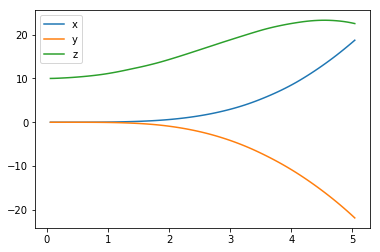

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

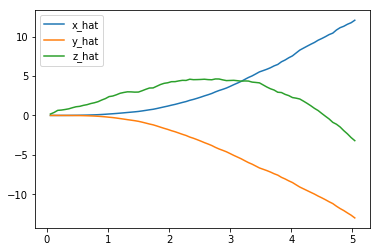

In [198]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

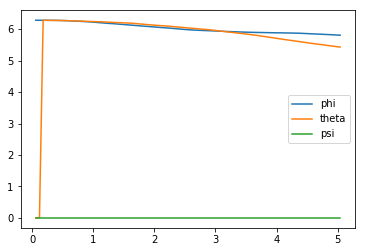

In [199]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

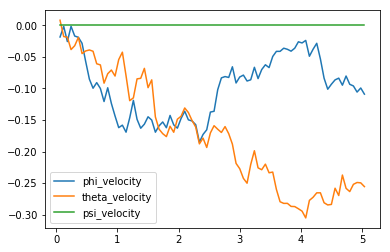

In [200]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

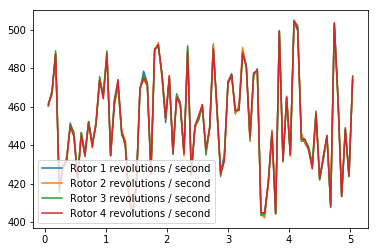

In [201]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [202]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 18.73563113 -21.8479084   22.53928637   5.80783248   5.43009202   0.        ]
[ 12.08327731 -13.00958096  -3.20049674]
[-0.1090956  -0.25559377  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [203]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from taskcopy import Task

num_episodes = 200
init_pos = np.array([0., 0., 0.])
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  200, score =  -0.525 (best =   0.128), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [215]:
## TODO: Train your agent here.

%reload_ext autoreload

import sys
sys.stdout.flush()
from agents.agent import Actor, Critic, OUNoise, ReplayBuffer, DDPG
from task import Task
import csv
import pandas as pd

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'training_data.txt'                # file name for saved results

target_pos = np.array([10., 10., 50.])           # set to take off and move forward a bit

task = Task(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities,
            runtime=runtime, target_pos=target_pos)
agent = DDPG(task)
done = False
labels = ['episode', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'cum_reward']
results = {x : [] for x in labels}
rewards_list = []
success_criteria = 650 # training to stop if agent achieves rolling average of 700
max_list = []
num_episodes = 2000

# Agent training

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        
        #stop the training if agent has learned to consistently score the criteria above
        if pd.Series(rewards_list).tail(25).mean() > success_criteria:
            break
        
        state = agent.reset_episode() #reset the episode
        cum_reward = 0 #variable to sum the cumulative rewards for each episode
        
        while True:
            rotor_speeds = agent.act(state)
            next_state, reward, done = task.step(rotor_speeds)
            
            #write the data from each timestep to the csv
            to_write = [i_episode] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) + [cum_reward]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            
            cum_reward += reward
            agent.step(rotor_speeds, reward, next_state, done)
            state = next_state

            if done:
                rewards_list.append(cum_reward)
                
                #track the max score achieved in training
                max_score = max(rewards_list)
                max_list.append(max_score)
                roll = pd.Series(rewards_list).tail(25).mean()
                
                #print the training progress
                print ("\rEpisode = {:4d}, Reward = {:4.3f}, Best Episode = {:4.3f}, Rolling Mean = {:4.3f}".format(i_episode, cum_reward, max_score, roll))
                
                break
        sys.stdout.flush()

Episode =    1, Reward = -199.896, Best Episode = -199.896, Rolling Mean = -199.896
Episode =    2, Reward = 14.139, Best Episode = 14.139, Rolling Mean = -92.878
Episode =    3, Reward = -299.184, Best Episode = 14.139, Rolling Mean = -161.647
Episode =    4, Reward = -199.896, Best Episode = 14.139, Rolling Mean = -171.209
Episode =    5, Reward = -199.896, Best Episode = 14.139, Rolling Mean = -176.946
Episode =    6, Reward = -244.861, Best Episode = 14.139, Rolling Mean = -188.266
Episode =    7, Reward = -93.727, Best Episode = 14.139, Rolling Mean = -174.760
Episode =    8, Reward = -99.224, Best Episode = 14.139, Rolling Mean = -165.318
Episode =    9, Reward = -199.548, Best Episode = 14.139, Rolling Mean = -169.121
Episode =   10, Reward = -99.569, Best Episode = 14.139, Rolling Mean = -162.166
Episode =   11, Reward = -299.286, Best Episode = 14.139, Rolling Mean = -174.632
Episode =   12, Reward = -199.236, Best Episode = 14.139, Rolling Mean = -176.682
Episode =   13, Rewa

Episode =  102, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -139.963
Episode =  103, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -135.964
Episode =  104, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -135.968
Episode =  105, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -131.980
Episode =  106, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -123.985
Episode =  107, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -119.986
Episode =  108, Reward = -99.993, Best Episode = 14.139, Rolling Mean = -115.987
Episode =  109, Reward = -99.992, Best Episode = 14.139, Rolling Mean = -115.988
Episode =  110, Reward = -99.992, Best Episode = 14.139, Rolling Mean = -115.990
Episode =  111, Reward = -99.992, Best Episode = 14.139, Rolling Mean = -107.991
Episode =  112, Reward = -99.992, Best Episode = 14.139, Rolling Mean = -99.993
Episode =  113, Reward = -299.955, Best Episode = 14.139, Rolling Mean = -107.991
Episode =  114, Reward = -29

Episode =  203, Reward = -296.412, Best Episode = 14.139, Rolling Mean = -296.426
Episode =  204, Reward = -296.401, Best Episode = 14.139, Rolling Mean = -296.425
Episode =  205, Reward = -296.391, Best Episode = 14.139, Rolling Mean = -296.424
Episode =  206, Reward = -296.412, Best Episode = 14.139, Rolling Mean = -296.422
Episode =  207, Reward = -296.406, Best Episode = 14.139, Rolling Mean = -296.421
Episode =  208, Reward = -296.428, Best Episode = 14.139, Rolling Mean = -296.420
Episode =  209, Reward = -296.420, Best Episode = 14.139, Rolling Mean = -296.420
Episode =  210, Reward = -296.408, Best Episode = 14.139, Rolling Mean = -296.419
Episode =  211, Reward = -296.403, Best Episode = 14.139, Rolling Mean = -296.418
Episode =  212, Reward = -296.431, Best Episode = 14.139, Rolling Mean = -296.418
Episode =  213, Reward = -296.395, Best Episode = 14.139, Rolling Mean = -296.417
Episode =  214, Reward = -296.448, Best Episode = 14.139, Rolling Mean = -296.418
Episode =  215, 

*The following code cells have been used to help understand how the agent was behaving during and after each training run. These are not intended to be my specific answers to the project rubric.*

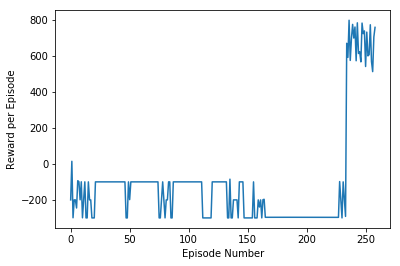

In [216]:
plt.plot(rewards_list)
plt.ylabel('Reward per Episode')
plt.xlabel('Episode Number')
plt.show()

The episode lasted 84 time steps or 5.04 seconds.
The agent collected 744.13 reward in the episode.


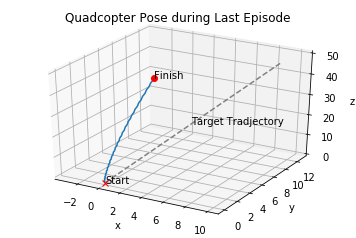

In [217]:
#Some additional packages needed to analyze the data

import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

#target tradjectory
x = [0,10]
y = [0,10]
z = [0,50]

#load the data from results into a pandas dataframe
df = pd.DataFrame.from_dict(results)
last = df[df.episode == df['episode'].max()]
print ('The episode lasted', len(last), 'time steps or', format(last['time'].max(), '.2f'), 'seconds.')
print ('The agent collected', format(last['cum_reward'].iloc[-1], '.2f'), 'reward in the episode.')

## Plot the pose in 3D
fig = plt.figure()
ax = fig.gca(projection='3d', xlabel='x', ylabel='y', zlabel='z')
ax.plot(x,y,z, color='grey', linestyle='--') #target tradjectory
ax.text(5,5,25, 'Target Tradjectory')
ax.plot(last['x'], last['y'], last['z'], linestyle='-') #actual tradjectory
plt.title('Quadcopter Pose during Last Episode')
ax.plot([init_pose[0]], [init_pose[1]], [init_pose[2]], color='r', marker='x')
ax.text(init_pose[0], init_pose[1], init_pose[2], 'Start')
ax.plot([last['x'].iloc[-1]], [last['y'].iloc[-1]], [last['z'].iloc[-1]], color='r', marker='o')
ax.text(last['x'].iloc[-1], last['y'].iloc[-1], last['z'].iloc[-1], 'Finish')
plt.show()

In [227]:
last.tail(15)

,episode,time,x,y,z,phi,theta,psi,x_velocity,y_velocity,z_velocity,phi_velocity,theta_velocity,psi_velocity,rotor_speed1,rotor_speed2,rotor_speed3,rotor_speed4,cum_reward
3082,259,4.20,-2.802687,9.526300,19.323074,4.534019,4.459038,0.0,-0.983095,3.696411,8.345755,28.824665,28.840901,0.0,-0.287727,900.336108,0.280803,899.414500,596.939498
3083,259,4.26,-2.821200,9.746726,19.809621,6.263461,6.189484,0.0,0.244522,3.421712,8.073258,28.823062,28.840572,0.0,-0.131339,900.149475,0.531431,899.575323,611.816171
3084,259,4.32,-2.814994,9.959171,20.308170,1.709746,1.636930,0.0,-0.346636,3.796682,8.335197,28.826598,28.848373,0.0,-0.268915,900.569231,0.792524,899.797218,626.883315
3085,259,4.38,-2.873185,10.178550,20.803089,3.439290,3.368310,0.0,-1.369458,3.469351,8.404219,28.824410,28.866048,0.0,-0.214836,901.334393,0.931518,899.604647,642.153370
3086,259,4.44,-2.935132,10.400737,21.314564,5.168996,5.100200,0.0,-0.440624,3.913521,8.374024,28.833821,28.862938,0.0,-0.485331,900.787462,0.433086,900.150076,650.352760
3087,259,4.50,-2.930950,10.619934,21.815491,0.615912,0.548911,0.0,0.287036,3.522563,8.570354,28.836793,28.867778,0.0,-0.487033,901.110648,0.708278,900.103100,658.604471
3088,259,4.56,-2.943472,10.846203,22.330074,2.345915,2.280812,0.0,-0.869808,3.842756,8.418037,28.827629,28.860459,0.0,-0.190157,900.618802,0.711910,899.553787,666.921951
3089,259,4.62,-3.016157,11.065808,22.845639,4.075566,4.012351,0.0,-1.226260,3.703286,8.851586,28.827310,28.856652,0.0,0.433266,900.576016,0.560002,899.735751,675.312579
3090,259,4.68,-3.052183,11.299276,23.366905,5.805183,5.743629,0.0,0.068523,3.784931,8.464176,28.826398,28.851392,0.0,0.685934,900.380360,0.791136,899.694428,683.757777
3091,259,4.74,-3.039432,11.519397,23.889229,1.251628,1.191474,0.0,0.025581,3.831909,8.899912,28.828323,28.849112,0.0,0.096360,900.373732,0.994919,899.816063,692.257355


* You can see above the quadcopter has found the 50% the 90% rewards from y_pos, the 50% reward from z_pos but is incurring a negative reward in the x_pos. 
* Interestingly, the quadcopter is flying using only rotor 2 and 4. 

The episode lasted 84 time steps or 5.04 seconds.
The agent collected 776.01 reward in the episode.


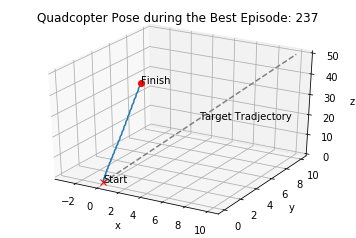

In [218]:
## Plot Pose from the Best Episode

best_ep = pd.Series(rewards_list).idxmax() + 1
best = df[df.episode == best_ep]
print ('The episode lasted', len(best), 'time steps or', format(best['time'].max(), '.2f'), 'seconds.')
print ('The agent collected', format(best['cum_reward'].iloc[-1], '.2f'), 'reward in the episode.')

fig = plt.figure()
ax = fig.gca(projection='3d', xlabel='x', ylabel='y', zlabel='z')
ax.plot(x,y,z, color='grey', linestyle='--') #target tradjectory
ax.text(5,5,25, 'Target Tradjectory')
ax.plot(best['x'], best['y'], best['z'], linestyle='-')
plt.title('Quadcopter Pose during the Best Episode: '+str(best_ep))
ax.plot([init_pose[0]], [init_pose[1]], [init_pose[2]], color='r', marker='x')
ax.text(init_pose[0], init_pose[1], init_pose[2], 'Start')
ax.plot([best['x'].iloc[-1]], [best['y'].iloc[-1]], [best['z'].iloc[-1]], color='r', marker='o')
ax.text(best['x'].iloc[-1], best['y'].iloc[-1], best['z'].iloc[-1], 'Finish')
plt.show()

The episode lasted 84 time steps or 5.04 seconds.
The agent collected 658.07 reward in the episode.


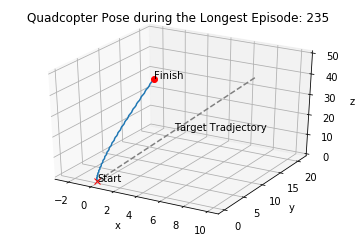

In [219]:
## Plot Pose from the Longest Episode

mode = df.episode.mode()
longest = df[df.episode == mode[0]]
print ('The episode lasted', len(longest), 'time steps or', format(longest['time'].max(), '.2f'), 'seconds.')
print ('The agent collected', format(longest['cum_reward'].iloc[-1], '.2f'), 'reward in the episode.')

fig = plt.figure()
ax = fig.gca(projection='3d', xlabel='x', ylabel='y', zlabel='z')
ax.plot(longest['x'], longest['y'], longest['z'], linestyle='-')
ax.plot(x,y,z, color='grey', linestyle='--') #target tradjectory
ax.text(5,5,25, 'Target Tradjectory')
plt.title('Quadcopter Pose during the Longest Episode: '+str(mode[0]))
ax.plot([init_pose[0]], [init_pose[1]], [init_pose[2]], color='r', marker='x')
ax.text(init_pose[0], init_pose[1], init_pose[2], 'Start')
ax.plot([longest['x'].iloc[-1]], [longest['y'].iloc[-1]], [longest['z'].iloc[-1]], color='r', marker='o')
ax.text(longest['x'].iloc[-1], longest['y'].iloc[-1], longest['z'].iloc[-1], 'Finish')
plt.show()

The episode lasted 32 time steps or 1.92 seconds.
The agent collected 103.99 reward in the episode.


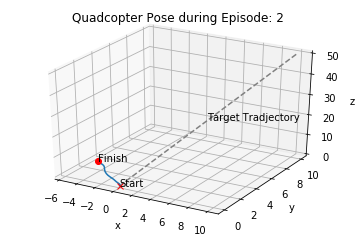

In [223]:
## Plot Pose from a Specific Episode if needed

episode = 2
specific = df[df.episode == episode]
print ('The episode lasted', len(specific), 'time steps or', format(specific['time'].max(), '.2f'), 'seconds.')
print ('The agent collected', format(specific['cum_reward'].iloc[-1], '.2f'), 'reward in the episode.')

fig = plt.figure()
ax = fig.gca(projection='3d', xlabel='x', ylabel='y', zlabel='z')
ax.plot(x,y,z, color='grey', linestyle='--') #target tradjectory
ax.text(5,5,25, 'Target Tradjectory')
ax.plot(specific['x'], specific['y'], specific['z'], linestyle='-')
plt.title('Quadcopter Pose during Episode: '+str(episode))
ax.plot([init_pose[0]], [init_pose[1]], [init_pose[2]], color='r', marker='x')
ax.text(init_pose[0], init_pose[1], init_pose[2], 'Start')
ax.plot([specific['x'].iloc[-1]], [specific['y'].iloc[-1]], [specific['z'].iloc[-1]], color='r', marker='o')
ax.text(specific['x'].iloc[-1], specific['y'].iloc[-1], specific['z'].iloc[-1], 'Finish')
plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [221]:
new_list = pd.DataFrame(rewards_list, columns = ['reward'])
new_list['rolling'] = new_list.rolling(20).mean()
new_list['cum_mean'] = new_list['reward'].expanding().mean()
#new_list.head(15)

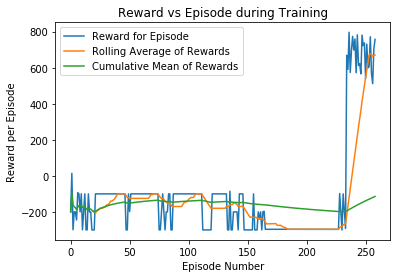

In [222]:
# Training Performance

plt.plot(new_list['reward'], label='Reward for Episode')
plt.plot(new_list['rolling'], label='Rolling Average of Rewards')
plt.plot(new_list['cum_mean'], label='Cumulative Mean of Rewards')
plt.ylabel('Reward per Episode')
plt.xlabel('Episode Number')
plt.title('Reward vs Episode during Training')
plt.legend()
plt.show()

* Above we can see the agent had a big breakthrough from episode 234 to episode 235 jumping from -291 to +668. From this point it changed it's poilicy to continue acheiving rewards around this level.
* Shortly after this point, the agent hit the stopping criteria for rolling mean of rewards > 650 on episode 259.

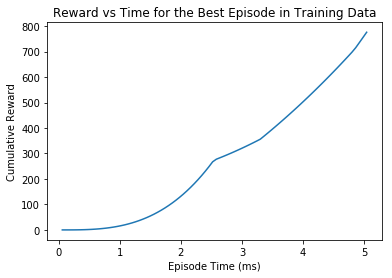

In [224]:
# Reward vs Time for the Best Episode in Training

plt.plot(best['time'], best['cum_reward'], label='Cumulative Reward')
plt.xlabel('Episode Time (ms)')
plt.ylabel('Cumulative Reward')
plt.title('Reward vs Time for the Best Episode in Training Data')
plt.show()

* For this episode I see the reward initially increasing with the time in air reward which is raised to the power of 2. Then I see the linear rewards for getting closer to the target position taking over from t=2.5 through t=5 as the quadcopter ascended on the z axis and y axis. It overshot the z target but the penalty for overshoot was probably cancelled out by the progress on the y-axis. This is an issue with the reward function as specified.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I have specified a target position task as moving from `init_pos(0,0,0)` to `target_pos(10,10,50)`. In order to achieve this, I designed a reward function that uses the following components:<br><br>
**1. Rewards:** 
* Time in Air
  * This component functions to reward increasing time in the air. I addded this after the agent kept learning policies that lasted only a few timesteps. It is deliberately scaled to ensure the reward here is less than the dist reward specified below. It is also biased to reward time in air during the first 2.5 seconds on an episode.  
  * It is calculated as:

```Python
if self.sim.time < 2.5:
    tia = self.sim.time ** 2
else:
    tia = (self.sim.time / 5) * 3
```

* Distance from Target
    * This component is the key component of the reward. It uses the current pose (`self.sim.pose`) and compares it to both the target_pos (`self.target_pos`) and init_pos (`self.init_x`) on each axis individually. Only `x_pos` is shown below.
    * When the current pose is between the init_pose and the target pose the reward is linear from 0 - 1. For eg.
> Init = 0, Current = 1, Target = 10, Reward = 1 / (10 - 0) = 0.1
    * Negative values on the x and y axis are possible and for this task are not desirable as they represent moving further away from the target pose. Therefore, if `self.sim.pos < 0` then the reward becomes negative. For eg.
> Init = 0, Current = -1, Target = 10, Reward = -1 / (10 - 0) = -0.1
    * Additionally, if the quadcopter overshoots the target_pos the reward is also flipped negative to discourage this behaviour. For eg.
> Init = 0, Current = 11, Target = 10, Reward = (10 - 11) / 10 = -0.1
    * There are additional rewards added if the agent reaches an x_pos reward of 0.5, 0.9 and 1.0. These values represent reaching 50%, 90% and 100% of the distance to the target_pose.
    * The same code has been used for the y and z axis substituting their `self.sim.pose` and `self.target_pos` components.
    * The distance reward for each axis is then summed together with equal weight for each axis.
    
```Python
## x_pos reward
if self.sim.pose[0] > self.target_pos[0]:
    x_pos = (self.target_pos[0] - self.sim.pose[0]) / 10
else:
    if self.target_pos[0] - self.init_x == 0:
        x_pos = 0
    else:
        x_pos = self.sim.pose[0] / (self.target_pos[0] - self.init_x)
        
#increased reward for getting close to the target_pos
if x_pos > 0.5:
    x_pos += 0.5
        
if x_pos > 0.9:
    x_pos += 0.9
            
if x_pos == 1:
    x_pos += 5
```
* Goal Completion
    * An additional reward was added if the agent completes the goal before the episode expires. This is set at an orders of magnitude so that an agent is incentivised to continue seeking it out if it indeed finds it during training. It is defined as below.

```Python
# reward for completing the task
if x_pos and y_pos and z_pos == 1:
    comp = 1000
else:
    comp = 0
```
  
**2. Punishment:**
* Goal not completed
    * Only one punishment was applied to the agent. This punishes the agent for not completing the task before the episode ends. This helped to incentivise episodes to last longer. It is defined as below.
    
```Python
# punishment for not completing the task
if (self.sim.time < 5) and (self.sim.done == True):
    punishment += 100
```

**3. Self-Reflection:**
* In order to arrive at the reward function discussed above I have tried numerous (> 100) permutations of different reward and punishment components. These included (but now removed from `task.py`), rewarding z velocity, penalizing pitch, roll and yaw of the quadcopter above a threshold, penalizing negative x and y pose amongst others. I had started with adjusting the starter code but couldn't get results that I was satisfied with so began to design my own function from scratch by re-creating the reward/punishment math in an Excel sheet and using specific poses observed from the training data to ensure the component math was behaving as I wanted (many times it was not :-)). This formed a feedback process whereby I got feedback from the training data each time I changed the reward function. As you can see above, for each training run I was plotting the Last, Best, Longest and a Specfic episode to see how the agent was behaving. It was especially helpful once I also plotted the target tradjectory onto each 3D graph.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

* I have used the proposed Actor-Critic (DDPG) algorithm.
* I have tried a number of permutations to the algorithm hyperparameters but have settled on the following:
   * $\gamma$ = 0.99
   * $\tau$ = 0.001
   * OU Noise $\mu$ = 0
   * OU Noise $\theta$ = 0.15
   * OU Noise $\sigma$ = 0.25
   * Replay Buffer = 100000
   * Batch Size = 64
* I haven't strayed too far from the starter neural nets provided in the agent I'm presenting here but if you look in `\agents\agent-Copy1.py` you can see that I did also try a number of other things in attempts to speed up training or  make training more stable. However, I have reverted to back to a simpler architecture as I have been able to achieve the best results with these. Summaries of the Actor and Critic model architectures are included below.

In [225]:
# Actor Model Architecture

print (agent.actor_local.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 18)                0         
_________________________________________________________________
dense_771 (Dense)            (None, 32)                608       
_________________________________________________________________
dense_772 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_773 (Dense)            (None, 32)                2080      
_________________________________________________________________
raw_actions (Dense)          (None, 4)                 132       
_________________________________________________________________
actions (Lambda)             (None, 4)                 0         
Total params: 4,932
Trainable params: 4,932
Non-trainable params: 0
_________________________________________________________________
None


In [226]:
# Critic Model Architecture

print (agent.critic_local.model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
states (InputLayer)             (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_777 (Dense)               (None, 32)           608         states[0][0]                     
__________________________________________________________________________________________________
dense_779 (Dense)               (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
dense_778 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
* I think I've chosen the hardest of the suggested tasks for this project. When I originally chose this task, I had not appreciated how differently one would approach the reward function design for the take off task vs the target position task.
* In the case presented above (and most previous permutations) the agent learned in a one or two aha moments. The first aha could occur within the first 100 episodes or not until 1000 episodes or more. Once it had I have also observed times where it retained the knowledge for the remainder of the training run or times where it has forgotten after some period. I don't have a clear explanation for this behaviour. Above you can see I have added a stopping criteria to training to pause the learning if it'd been able to achieve a mean reward of 650 over the last 25 runs. I arrived at the 650 number from observing a few training runs and the best episodes from them. The mean over 25 runs to me signified the agent had updated it's policy to achieve this score.
* The average rewards for the last 25 runs was +669. When I look at the pose for the quadcopter during the last few runs, I can see the quadcopter hasn't found all of the rewards that I have specified in the reward function. See text below the last episode chart above.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
* As someone who owns and loves flying their drone I have a new found appreciation for the control software that is embedded within them. After this I can't even imagine trying to fly a drone with four levers on the controller for the RPM of each motor. The drone I own (DJI Mavic Pro) could easily complete a simple task like the one I specified. It'd only require the pilot to specify the GPS coordinates and altitude of where I want it to be and push go. It would take off, rotate to it's heading and make a beautiful parabolic flight tradjectory to target position and hover in place awaiting further input from the pilot. It'd also avoid any physcial obstacle in it's way and deal with almost any wind condition en route without pilot intervention. So, I guess with this in mind, I refused to believe that this task isn't 100% possible :-)

* That isn't to say that it's in any way simple. I've certainly found this project a challenge. I first had some trouble getting the starter code to run and the provided agent to train. Once I had the code executing I then had a learning curve trying to understand the interplay of the agents actions and the environment. Once I got a handle on this, I began to see which levers I had available to play with in controlling the behaviour of the agent in the environment. The bulk of my time was then spent pulling the various levers in optimization. This was the most rewarding part as with (most) changes came some immediate feedback in the form of the *Rewards vs Episode* training chart.

* The most fascinating (and at times frustrating) part has been seeing the agent *almost* achieve the goal so many times yet not be able to get it to repeatdly learn from the close attempts. I can't tell if I'm tantilizingly close to a robust solution or at the limit of the various assumptions I've implemented and shouldn't expect any more from my agent. Either way, after submitting this, I'm probably going to keep running the training code cells in hopes of a perfect training run! :-)